In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [3]:
train_dir = "/kaggle/input/10-monkey-species/training/training"
valid_dir = "/kaggle/input/10-monkey-species/validation/validation"
label_file = "/kaggle/input/10-monkey-species/monkey_labels.txt"
# Need to see the file structure!
print(os.listdir(train_dir))
print(os.listdir(valid_dir))

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: '/kaggle/input/10-monkey-species/training/training'

In [4]:
os.path.exists("/kaggle/input/10-monkey-species/monkey_labels.txt")

False

In [23]:
labels = pd.read_csv(label_file, header=0)
print(labels)

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

In [38]:
# Image Scaling
height = 128
width = 128
channels = 3
batch_size = 64
num_classes = 10

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,  # percentage
    height_shift_range = 0.2,  # percentage
    shear_range = 0.2,  # shear strength
    zoom_range = 0.2,  # zoom strength
    horizontal_flip = True,
    fill_mode = "nearest",
)
train_generator = train_datagen.flow_from_directory(
    train_dir,  # folder path
    target_size = (height, width),  # zoom size
    batch_size = batch_size,  # how many in one batch
    seed = 7,
    shuffle = True,
    class_mode = "categorical"  # before one_hot encode
)

Found 1098 images belonging to 10 classes.


In [39]:
valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255  # only need to do this
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,  # folder path
    target_size = (height, width),  # zoom size
    batch_size = batch_size,  # how many in one batch
    seed = 7,
    shuffle = False,
    class_mode = "categorical"  # before one_hot encode
)

Found 272 images belonging to 10 classes.


In [49]:
train_num = train_generator.samples
valid_num = valid_generator.samples

In [50]:
for i in range(1):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(64, 128, 128, 3) (64, 10)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.

## Modeling

In [45]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same",
                        activation="selu", input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same",
                        activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                        activation="selu"),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                        activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                        activation="selu"),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                        activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="selu"),
    keras.layers.Dense(num_classes, activation="softmax"),
])

model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 128)       7

In [51]:
epochs = 300  # raise this!
# fit fit_generator?
history = model.fit_generator(train_generator, 
                              steps_per_epoch = train_num // batch_size,
                              epochs = epochs,
                              validation_data = valid_generator,
                              validation_steps = valid_num // batch_size)

Epoch 1/10
17/17 [==============================] - 44s 3s/step - loss: 11.4075 - accuracy: 0.1296 - val_loss: 3.4636 - val_accuracy: 0.2109
Epoch 2/10
17/17 [==============================] - 39s 2s/step - loss: 2.6409 - accuracy: 0.1838 - val_loss: 2.2095 - val_accuracy: 0.2461
Epoch 3/10
17/17 [==============================] - 40s 2s/step - loss: 2.0797 - accuracy: 0.2824 - val_loss: 2.0230 - val_accuracy: 0.2188
Epoch 4/10
17/17 [==============================] - 40s 2s/step - loss: 1.9278 - accuracy: 0.3317 - val_loss: 1.7685 - val_accuracy: 0.4219
Epoch 5/10
17/17 [==============================] - 39s 2s/step - loss: 1.7890 - accuracy: 0.3743 - val_loss: 1.7923 - val_accuracy: 0.3711
Epoch 6/10
17/17 [==============================] - 40s 2s/step - loss: 1.7590 - accuracy: 0.3743 - val_loss: 1.8235 - val_accuracy: 0.3633
Epoch 7/10
17/17 [==============================] - 41s 2s/step - loss: 1.6607 - accuracy: 0.4178 - val_loss: 1.5094 - val_accuracy: 0.4453
Epoch 8/10
17/17 [=

In [52]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


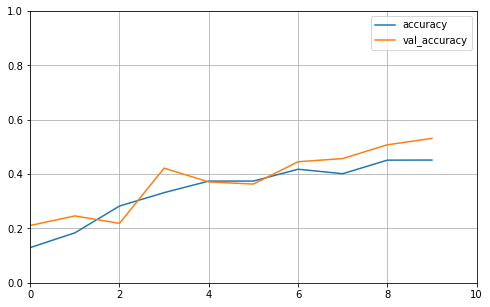

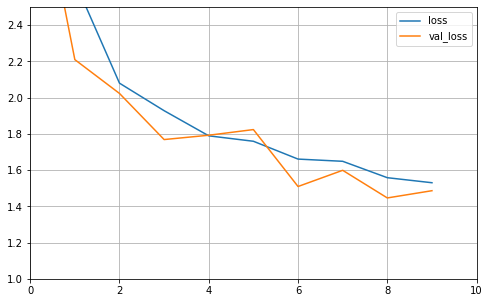

In [56]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
    
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 1, 2.5)